In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
class Company:
    
    risk_free_rate = 0.0125
    required_rate_of_return = 0.15
    
    def __init__(self, data):
        self.number_of_projected_years = len(data.axes[1]) - 1
        self.current_assets = data['current_assets']
        self.current_liabilities = data['current_liabilities']
        self.total_liabilities = data['total_liabilities']
        self.equity = data['equity']
        self.eps = data['eps']
        self.share_price = data['share_price']
        self.revenue = data['revenue']
        self.ppe = data['ppe']
        self.operating_cash_flow = data['operating_cash_flow']
        self.current_dividend_per_share = data.loc['2019', 'historical_dividends']
        self.historical_dividends = data['historical_dividends']
        self.lt_debt = data['lt_debt']
        self.current_shares_outstanding = data.loc['2019', 'shares_outstanding']
        

    def get_current_ratio(self):
        return self.current_assets / self.current_liabilities

    def get_debt_to_equity(self):
        return self.total_liabilities / self.equity

    def price_to_eps(self):
        return self.share_price / self.eps.replace({0 : np.nan})    

    def eps_growth(self):
        return float(pd.DataFrame(self.eps.replace({0 : np.nan})).pct_change().mean(skipna = True) * 100)

    def get_avg_revenue_growth(self):
        return float(pd.DataFrame(self.revenue).pct_change().mean(skipna = True) * 100)

    def get_g_m_capex_per_year(self):
        ppe_to_revenue = self.ppe / self.revenue
        revenue_increase = [
            np.nan if i == 0 else self.revenue[i] - self.revenue[i - 1] for i, revenue in  enumerate(self.revenue)
        ]
        gcapex = ppe_to_revenue * revenue_increase
        mcapex = self.ppe - gcapex

        return mcapex

    def get_cash_for_owners(self):
        cash_for_owners = self.operating_cash_flow - self.get_g_m_capex_per_year()

        return cash_for_owners 
        
    def get_avg_owners_cash_growth(self):
        return float(pd.DataFrame(self.get_cash_for_owners()).pct_change().mean(skipna = True) * 100)

    def get_dividend_yield(self):
        return self.current_dividend_per_share / self.share_price * 100

    def get_roic(self):
        return (self.get_cash_for_owners() / (self.lt_debt + self.equity)) * 100

    def get_discounted_cash_flow_valuation(self, growth_rate):
        dcf = []
        for i in range(0, self.number_of_projected_years + 2):
            if i == 0:
                dcf.append(self.get_cash_for_owners()['2019'])
            else:
                dcf.append(dcf[-1] * (1 + growth_rate))
            if i == self.number_of_projected_years + 1:
                dcf.append(dcf[-1] * 10)

        return dcf

    def get_company_intrinsic_value(self, growth_rate):
        return np.npv(self.risk_free_rate, self.get_discounted_cash_flow_valuation(growth_rate))

    def get_company_buy_price(self, growth_rate):
        return np.npv(self.required_rate_of_return, self.get_discounted_cash_flow_valuation(growth_rate)) / self.current_shares_outstanding

    def get_dividend_discount_model_valuation(self):
        dividend_growth = self.historical_dividends.pct_change().mean()
        return self.current_dividend_per_share / (self.required_rate_of_return - dividend_growth / 100)
    
    def plot_growth_rate_vs_buy_price(self, max_growth_rate, min_growth_rate = 0):
        growth_rate_array = np.linspace(min_growth_rate, max_growth_rate, 100)
        buy_price_array = [self.get_company_buy_price(growth_rate) for growth_rate in growth_rate_array]
        plt.plot(growth_rate_array, buy_price_array)
        plt.xlabel('Growth Rate')
        plt.ylabel('Buy Price ($)')


In [45]:
def stock_analysis_output(company_instance, max_growth_rate):
    company_instance.plot_growth_rate_vs_buy_price(max_growth_rate)
    print("AVG revenue growth\n",
    company_instance.get_avg_revenue_growth(),
    "\n\nAVG EPS growth\n",
    company_instance.eps_growth(),
    "\n\nCash for owners\n",
    company_instance.get_cash_for_owners(),
    "\n\nAVG cash growth\n",
    company_instance.get_avg_owners_cash_growth(),
    "\n\nROIC\n",
    company_instance.get_roic(),
    "\n\nP/E\n",
    company_instance.price_to_eps(),
    "\n\nDebt to equity\n",
    company_instance.get_debt_to_equity(),
    "\n\nCurrent ratio - assets to liabilities\n",
    company_instance.get_current_ratio(),
    "\n\nCurrent stock price:\n",
    si.get_live_price("company_instance"))

In [46]:
a2m_data = pd.read_csv('a2m.csv', index_col=0)
a2m_data = a2m_data.transpose()
a2m = Company(a2m_data)
stock_analysis_output(a2m, 0.30)

AssertionError: {'chart': {'result': None, 'error': {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}}}

AVG revenue growth
 19.290835362158795 

AVG EPS growth
 165.79812894245885 

Cash for owners
 2010          NaN
2011     1.822222
2012     7.166667
2013    12.181818
2014    19.120000
2015          NaN
2016    15.698413
2017    41.750000
2018    62.170213
2019    93.539419
dtype: float64 

AVG cash growth
 83.45619368764096 

ROIC
 2010   NaN
2011   NaN
2012   NaN
2013   NaN
2014   NaN
2015   NaN
2016   NaN
2017   NaN
2018   NaN
2019   NaN
dtype: float64 

P/E
 2010     -1.928571
2011     -2.000000
2012      3.000000
2013    100.000000
2014     23.090909
2015      3.402062
2016     23.666667
2017     26.714286
2018     50.948718
2019     45.120690
dtype: float64 

Debt to equity
 2010    2.555556
2011    5.750000
2012    3.777778
2013    9.000000
2014    6.125000
2015    0.411392
2016    0.500000
2017    0.505495
2018    0.531401
2019    0.505703
dtype: float64 

Current ratio - assets to liabilities
 2010    0.909091
2011    0.818182
2012    1.000000
2013    1.000000
2014    1.225000

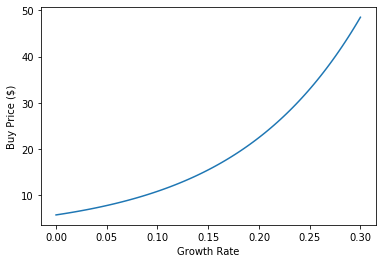

In [34]:
alu_data = pd.read_csv('alu.csv', index_col=0)
alu_data = alu_data.transpose()
alu = Company(alu_data)
stock_analysis_output(alu, 0.30)

AVG revenue growth
 7.053731762843104 

AVG EPS growth
 14.335571380110634 

Cash for owners
 2010          NaN
2011    40.588832
2012    46.171569
2013    29.170576
2014    39.709259
2015    22.432638
2016    39.190972
2017    44.940594
2018    71.340491
2019    35.978947
dtype: float64 

AVG cash growth
 8.513205730024891 

ROIC
 2010          NaN
2011    26.356385
2012    25.230365
2013    13.759706
2014    16.754962
2015     8.866655
2016    15.308974
2017    15.182633
2018    21.750150
2019    10.078137
dtype: float64 

P/E
 2010     9.294118
2011    13.875000
2012     9.142857
2013    14.605263
2014    26.324324
2015    19.388889
2016    17.307692
2017    22.951220
2018    28.977778
2019    24.750000
dtype: float64 

Debt to equity
 2010    0.593333
2011    0.584416
2012    0.570621
2013    0.681592
2014    0.577465
2015    0.562771
2016    0.504065
2017    0.607692
2018    0.572438
2019    0.641935
dtype: float64 

Current ratio - assets to liabilities
 2010    2.054054
2011    

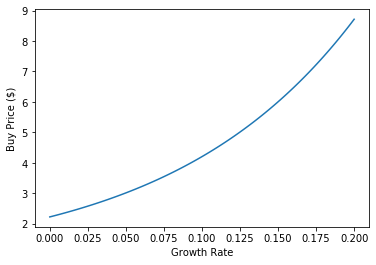

In [35]:
brg_data = pd.read_csv('brg.csv', index_col=0)
brg_data = brg_data.transpose()
brg = Company(brg_data)
stock_analysis_output(brg, 0.20)

2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014    28.175559
2015    22.734656
2016    23.994246
2017    26.116625
2018    20.451277
2019    15.379054
dtype: float64

Number of past dividends 10
None 
AVG revenue growth
 15.01556026195482 
cash for owners
 2010           NaN
2011     57.588235
2012     67.347826
2013     86.432558
2014     99.177966
2015    100.487179
2016    116.372093
2017    122.225806
2018    111.459459
2019    122.417266
dtype: float64 
AVG cash growth
 10.401449764301455 
ROIC
 2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014    28.175559
2015    22.734656
2016    23.994246
2017    26.116625
2018    20.451277
2019    15.379054
dtype: float64 
P/E
 2010    25.526316
2011    20.583333
2012    17.032258
2013    25.942857
2014    26.725000
2015    23.953488
2016    26.133333
2017    24.733333
2018    18.815789
2019    40.457143
dtype: float64 
eps growth
 12.196008832338968 
debt to equity
 2010    0.280899
201

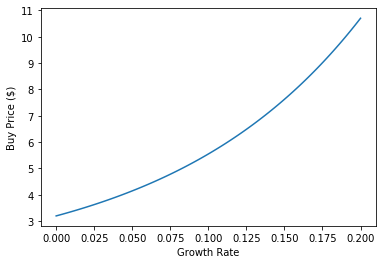

In [40]:
car_data = pd.read_csv('car.csv', index_col=0)

car_data = car_data.transpose()

car = Company(car_data)
print(car.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
car.get_avg_revenue_growth(),
"\ncash for owners\n",
car.get_cash_for_owners(),
"\nAVG cash growth\n",
car.get_avg_owners_cash_growth(),
"\nROIC\n",
car.get_roic(),
"\nP/E\n",
car.price_to_eps(),
"\neps growth\n",
car.eps_growth(),
"\ndebt to equity\n",
car.get_debt_to_equity(),
"\ndividend model\n",
car.get_dividend_discount_model_valuation())

None 
AVG revenue growth
 12.160609368073011 
cash for owners
 2010            NaN
2011     792.433620
2012     884.188134
2013    1030.151021
2014    1040.580964
2015    1342.574423
2016     901.389796
2017     588.655040
2018    1446.815605
2019     795.031976
dtype: float64 
AVG cash growth
 11.412369624879675 
ROIC
 2010          NaN
2011    20.815173
2012    19.609406
2013    20.516850
2014    19.523095
2015    20.613764
2016    11.897965
2017     6.473716
2018    13.008592
2019     5.885202
dtype: float64 
P/E
 2010    18.697297
2011    20.597701
2012    16.783069
2013    22.370229
2014    25.157343
2015    23.944882
2016    28.099723
2017    30.952756
2018    31.714563
2019    45.107794
dtype: float64 
eps growth
 15.13610839801581 
debt to equity
 2010    0.354923
2011    0.390779
2012    0.697491
2013    0.987353
2014    0.985404
2015    1.330165
2016    1.945907
2017    1.883540
2018    1.640942
2019    1.465144
dtype: float64 
dividend model
 12.491253503710407


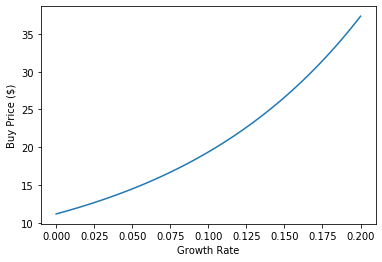

In [43]:
csl_data = pd.read_csv('csl.csv', index_col=0)

csl_data = csl_data.transpose()

csl = Company(csl_data)
print(csl.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
csl.get_avg_revenue_growth(),
"\ncash for owners\n",
csl.get_cash_for_owners(),
"\nAVG cash growth\n",
csl.get_avg_owners_cash_growth(),
"\nROIC\n",
csl.get_roic(),
"\nP/E\n",
csl.price_to_eps(),
"\neps growth\n",
csl.eps_growth(),
"\ndebt to equity\n",
csl.get_debt_to_equity(),
"\ndividend model\n",
csl.get_dividend_discount_model_valuation())

2009          NaN
2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016    21.684485
2017    13.488470
2018    16.349051
2019    18.090100
dtype: float64
None 
AVG revenue growth
 29.892926128791096 
cash for owners
 2009           NaN
2010           NaN
2011     11.304348
2012      4.876923
2013     12.666667
2014     10.568807
2015     22.331633
2016     63.969231
2017     57.730650
2018     81.745257
2019    110.711409
dtype: float64 
AVG cash growth
 56.416899829662604 
ROIC
 2009          NaN
2010          NaN
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016    21.684485
2017    13.488470
2018    16.349051
2019    18.090100
dtype: float64 
P/E
 2009          NaN
2010    36.600000
2011    16.846154
2012    23.812500
2013    32.937500
2014    62.473684
2015    42.000000
2016    41.139535
2017    49.037736
2018    39.056338
2019    10.126582
dtype: float64 
eps growth
 41.25027293

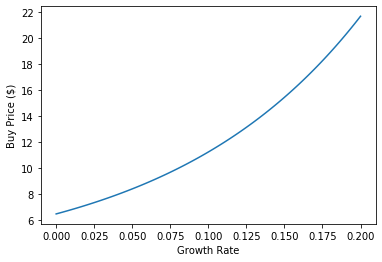

In [29]:
ctd_data = pd.read_csv('ctd.csv', index_col=0)

ctd_data = ctd_data.transpose()

CTD = Company(ctd_data)

print(CTD.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
CTD.get_avg_revenue_growth(),
"\ncash for owners\n",
CTD.get_cash_for_owners(),
"\nAVG cash growth\n",
CTD.get_avg_owners_cash_growth(),
"\nROIC\n",
CTD.get_roic(),
"\nP/E\n",
CTD.price_to_eps(),
"\neps growth\n",
CTD.eps_growth(),
"\ndebt to equity\n",
CTD.get_debt_to_equity())

None 
AVG revenue growth
 15.091758358821814 
cash for owners
 2009          NaN
2010    18.000000
2011    -9.000000
2012    32.228916
2013   -15.000000
2014    -2.779343
2015     7.796610
2016     1.965517
2017    -1.574661
2018   -10.698745
2019    30.450667
dtype: float64 
AVG cash growth
 -141.85819899543023 
ROIC
 2009          NaN
2010    12.080537
2011    -4.864865
2012    17.052336
2013    -6.024096
2014    -0.917275
2015     2.660959
2016     0.500132
2017    -0.377616
2018    -2.201388
2019     6.139247
dtype: float64 
P/E
 2009          NaN
2010          NaN
2011     8.847826
2012     6.886792
2013    10.300000
2014    13.444444
2015     9.907407
2016     7.818182
2017     9.122807
2018    10.722222
2019     9.344262
dtype: float64 
eps growth
 9.929524906385701 
debt to equity
 2009    0.741935
2010    0.889908
2011    0.800000
2012    0.291892
2013    0.447115
2014    0.564885
2015    0.342657
2016    0.475570
2017    0.530303
2018    0.702550
2019    0.517241
dtype: float

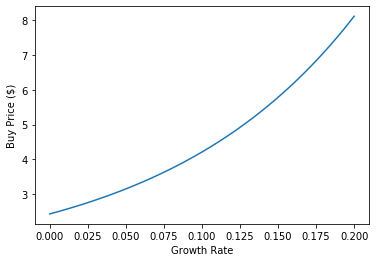

In [46]:
cwp_data = pd.read_csv('cwp_test.csv', index_col=0)

cwp_data = cwp_data.transpose()

CWP = Company(cwp_data)

print(CWP.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
CWP.get_avg_revenue_growth(),
"\ncash for owners\n",
CWP.get_cash_for_owners(),
"\nAVG cash growth\n",
CWP.get_avg_owners_cash_growth(),
"\nROIC\n",
CWP.get_roic(),
"\nP/E\n",
CWP.price_to_eps(),
"\neps growth\n",
CWP.eps_growth(),
"\ndebt to equity\n",
CWP.get_debt_to_equity())

None 
AVG revenue growth
 11.76259796824905 
cash for owners
 2010           NaN
2011     68.467388
2012    171.485294
2013    122.904474
2014      6.818599
2015    139.932092
2016    136.971674
2017    156.574627
2018    247.659177
2019    245.004087
dtype: float64 
AVG cash growth
 256.14876545830685 
ROIC
 2010          NaN
2011    17.783737
2012    51.189640
2013    33.397955
2014     1.435495
2015    29.031554
2016    26.596442
2017    11.081007
2018    17.477712
2019    16.520842
dtype: float64 
P/E
 2010    18.401869
2011    19.140000
2012    11.076190
2013    10.818966
2014    14.776000
2015    12.770370
2016    14.640000
2017    17.156863
2018    13.542289
2019    12.744186
dtype: float64 
eps growth
 8.460176594572385 
debt to equity
 2010    1.436860
2011    4.046053
2012    3.389189
2013    2.454918
2014    1.915254
2015    1.609329
2016    1.451852
2017    1.872365
2018    1.628692
2019    1.441571
dtype: float64 
dividend model
 6.885267693527188


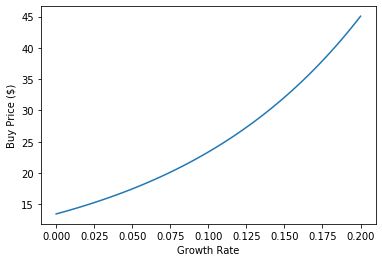

In [47]:
jbh_data = pd.read_csv('jbh.csv', index_col=0)

jbh_data = jbh_data.transpose()

jbh = Company(jbh_data)
print(jbh.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
jbh.get_avg_revenue_growth(),
"\ncash for owners\n",
jbh.get_cash_for_owners(),
"\nAVG cash growth\n",
jbh.get_avg_owners_cash_growth(),
"\nROIC\n",
jbh.get_roic(),
"\nP/E\n",
jbh.price_to_eps(),
"\neps growth\n",
jbh.eps_growth(),
"\ndebt to equity\n",
jbh.get_debt_to_equity(),
"\ndividend model\n",
jbh.get_dividend_discount_model_valuation())

None 
AVG revenue growth
 12.27937671546971 
cash for owners
 2009          NaN
2010    15.815000
2011    43.531120
2012    28.769517
2013    42.809668
2014    36.994505
2015    12.147139
2016    27.965261
2017    41.526190
2018    55.184211
2019    16.896552
dtype: float64 
AVG cash growth
 27.957405980461015 
ROIC
 2009          NaN
2010     6.644958
2011    18.290387
2012    11.107922
2013    14.761954
2014    10.945120
2015     3.520910
2016     8.372832
2017    13.058550
2018    13.076827
2019     3.779989
dtype: float64 
P/E
 2009          NaN
2010          inf
2011     8.466667
2012    11.769231
2013    17.333333
2014    10.263158
2015    15.777778
2016    11.466667
2017    12.588235
2018    11.952381
2019    12.173913
dtype: float64 
eps growth
 inf 
debt to equity
 2009    0.442029
2010    0.335052
2011    0.333333
2012    0.331797
2013    0.280632
2014    0.350000
2015    0.373665
2016    0.337884
2017    0.344156
2018    0.461140
2019    0.345154
dtype: float64


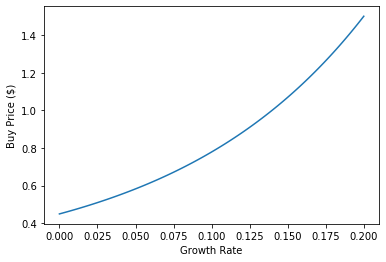

In [56]:
kmd_data = pd.read_csv('kmd_test.csv', index_col=0)

kmd_data = kmd_data.transpose()

KMD = Company(kmd_data)

print(KMD.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
KMD.get_avg_revenue_growth(),
"\ncash for owners\n",
KMD.get_cash_for_owners(),
"\nAVG cash growth\n",
KMD.get_avg_owners_cash_growth(),
"\nROIC\n",
KMD.get_roic(),
"\nP/E\n",
KMD.price_to_eps(),
"\neps growth\n",
KMD.eps_growth(),
"\ndebt to equity\n",
KMD.get_debt_to_equity())

2010          NaN
2011    -2.265543
2012    -8.791209
2013     0.000000
2014     6.652661
2015    10.018679
2016    -8.539144
2017     8.507800
2018     7.912879
2019     1.001351
dtype: float64
None 
AVG revenue growth
 24.542254006768072 
cash for owners
 2010          NaN
2011    -1.653846
2012    -8.000000
2013     0.000000
2014     8.382353
2015    15.128205
2016   -15.114286
2017    17.270833
2018    19.386555
2019     3.554795
dtype: float64 
AVG cash growth
 inf 
ROIC
 2010          NaN
2011    -2.265543
2012    -8.791209
2013     0.000000
2014     6.652661
2015    10.018679
2016    -8.539144
2017     8.507800
2018     7.912879
2019     1.001351
dtype: float64 
P/E
 2010     30.363636
2011     59.785714
2012     77.416667
2013    172.000000
2014     98.833333
2015     69.812500
2016     72.111111
2017     38.814815
2018     35.100000
2019     28.962264
dtype: float64 
eps growth
 24.074688685799803 
debt to equity
 2010    1.222222
2011    1.583333
2012    1.625000
2013    0.69

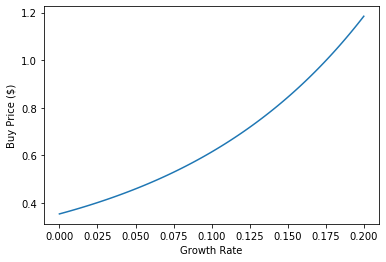

In [33]:
lic_data = pd.read_csv('lic.csv', index_col=0)

lic_data = lic_data.transpose()

LIC = Company(lic_data)

print(LIC.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
LIC.get_avg_revenue_growth(),
"\ncash for owners\n",
LIC.get_cash_for_owners(),
"\nAVG cash growth\n",
LIC.get_avg_owners_cash_growth(),
"\nROIC\n",
LIC.get_roic(),
"\nP/E\n",
LIC.price_to_eps(),
"\neps growth\n",
LIC.eps_growth(),
"\ndebt to equity\n",
LIC.get_debt_to_equity())


2010          NaN
2011    -3.153392
2012    -2.548638
2013     1.868810
2014    -1.760781
2015    10.566168
2016    19.427272
2017    19.852282
2018    21.977639
2019    14.032239
dtype: float64
None 
AVG revenue growth
 3.8090661899813694 
cash for owners
 2010            NaN
2011    -353.116877
2012    -271.914139
2013     197.458497
2014    -124.328736
2015     721.986286
2016    1226.832235
2017    1326.926531
2018    1565.687034
2019     970.048701
dtype: float64 
AVG cash growth
 -122.65654292062875 
ROIC
 2010          NaN
2011    -3.153392
2012    -2.548638
2013     1.868810
2014    -1.760781
2015    10.566168
2016    19.427272
2017    19.852282
2018    21.977639
2019    14.032239
dtype: float64 
P/E
 2010    56.200000
2011    20.666667
2012   -14.916667
2013          inf
2014    -0.985401
2015    10.740741
2016     7.959184
2017     8.043478
2018    10.089286
2019     5.296296
dtype: float64 
eps growth
 -inf 
debt to equity
 2010    2.328875
2011    2.390993
2012    2.596196


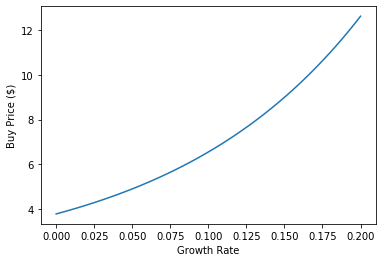

In [34]:
qan_data = pd.read_csv('qan.csv', index_col=0)

qan_data = qan_data.transpose()

qan = Company(qan_data)

print(qan.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
qan.get_avg_revenue_growth(),
"\ncash for owners\n",
qan.get_cash_for_owners(),
"\nAVG cash growth\n",
qan.get_avg_owners_cash_growth(),
"\nROIC\n",
qan.get_roic(),
"\nP/E\n",
qan.price_to_eps(),
"\neps growth\n",
qan.eps_growth(),
"\ndebt to equity\n",
qan.get_debt_to_equity())

None 
AVG revenue growth
 19.4224158351566 
cash for owners
 2010           NaN
2011     58.882353
2012     71.316547
2013    126.797619
2014    164.009153
2015    155.906310
2016    187.793651
2017    246.299553
2018    280.337947
2019    301.347503
dtype: float64 
AVG cash growth
 24.53009442345833 
ROIC
 2010          NaN
2011    29.889519
2012    28.412967
2013    40.253212
2014    40.198322
2015    27.940199
2016    15.545832
2017    21.159755
2018    22.409108
2019    30.907436
dtype: float64 
P/E
 2010     25.675000
2011     22.264151
2012     20.045455
2013     32.168675
2014     43.368421
2015     30.704403
2016     25.994792
2017     36.410256
2018     40.593750
2019    115.000000
dtype: float64 
eps growth
 14.03969624110864 
debt to equity
 2010    0.330935
2011    0.258883
2012    0.199203
2013    0.253968
2014    0.269608
2015    0.200717
2016    1.072626
2017    0.961491
2018    0.831031
2019    0.746961
dtype: float64 
dividend model
 5.958498348888024


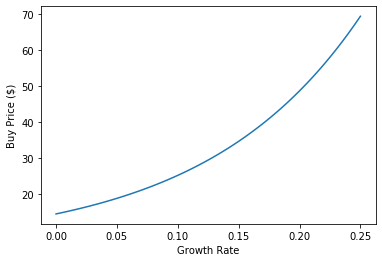

In [59]:
rea_data = pd.read_csv('rea.csv', index_col=0)

rea_data = rea_data.transpose()

rea = Company(rea_data)
print(rea.plot_growth_rate_vs_buy_price(.25),
"\nAVG revenue growth\n",
rea.get_avg_revenue_growth(),
"\ncash for owners\n",
rea.get_cash_for_owners(),
"\nAVG cash growth\n",
rea.get_avg_owners_cash_growth(),
"\nROIC\n",
rea.get_roic(),
"\nP/E\n",
rea.price_to_eps(),
"\neps growth\n",
rea.eps_growth(),
"\ndebt to equity\n",
rea.get_debt_to_equity(),
"\ndividend model\n",
rea.get_dividend_discount_model_valuation())

2009          NaN
2010     6.758948
2011     9.349208
2012     9.270196
2013     7.147184
2014    11.548199
2015     9.685833
2016     9.142677
2017     8.330746
2018     8.986360
2019     5.242796
dtype: float64
None 
AVG revenue growth
 14.349269772895715 
cash for owners
 2009           NaN
2010    169.987552
2011    234.571622
2012    224.802245
2013    197.834059
2014    353.836830
2015    420.074590
2016    473.316374
2017    452.942656
2018    545.382182
2019    431.586989
dtype: float64 
AVG cash growth
 14.146755884682676 
ROIC
 2009          NaN
2010     6.758948
2011     9.349208
2012     9.270196
2013     7.147184
2014    11.548199
2015     9.685833
2016     9.142677
2017     8.330746
2018     8.986360
2019     5.242796
dtype: float64 
P/E
 2009          NaN
2010    25.188406
2011    20.177778
2012    27.303571
2013    39.491935
2014    44.615385
2015    33.858696
2016    32.412037
2017    28.634043
2018    32.618280
2019    29.460076
dtype: float64 
eps growth
 17.36908981

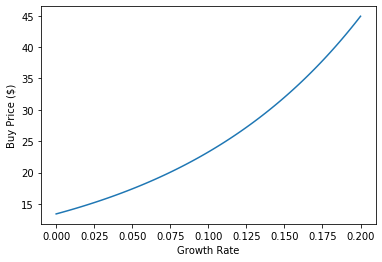

In [35]:
rhc_data = pd.read_csv('rhc.csv', index_col=0)

rhc_data = rhc_data.transpose()

rhc = Company(rhc_data)

print(rhc.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
rhc.get_avg_revenue_growth(),
"\ncash for owners\n",
rhc.get_cash_for_owners(),
"\nAVG cash growth\n",
rhc.get_avg_owners_cash_growth(),
"\nROIC\n",
rhc.get_roic(),
"\nP/E\n",
rhc.price_to_eps(),
"\neps growth\n",
rhc.eps_growth(),
"\ndebt to equity\n",
rhc.get_debt_to_equity())

2014          NaN
2015    17.792502
2016    12.896406
2017    19.942197
2018    15.652174
2019    30.276558
dtype: float64
None 
AVG revenue growth
 29.302320071569532 
cash for owners
 2014           NaN
2015     24.197802
2016     44.363636
2017     69.000000
2018     54.000000
2019    102.032000
dtype: float64 
AVG cash growth
 51.51981660254692 
ROIC
 2014          NaN
2015    17.792502
2016    12.896406
2017    19.942197
2018    15.652174
2019    30.276558
dtype: float64 
P/E
 2014          NaN
2015     7.800000
2016    15.172414
2017    19.705882
2018    25.413043
2019    12.416667
dtype: float64 
eps growth
 25.470830761090035 
debt to equity
 2014         NaN
2015    1.024096
2016    1.257732
2017    1.263415
2018    0.589041
2019    0.711191
dtype: float64


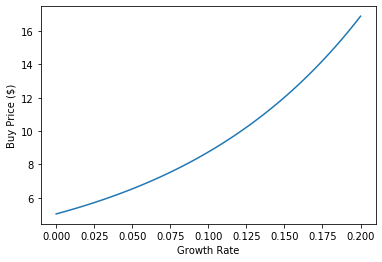

In [6]:
siq_data = pd.read_csv('siq.csv', index_col=0)

siq_data = siq_data.transpose()

SIQ = Company(siq_data)

print(SIQ.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
SIQ.get_avg_revenue_growth(),
"\ncash for owners\n",
SIQ.get_cash_for_owners(),
"\nAVG cash growth\n",
SIQ.get_avg_owners_cash_growth(),
"\nROIC\n",
SIQ.get_roic(),
"\nP/E\n",
SIQ.price_to_eps(),
"\neps growth\n",
SIQ.eps_growth(),
"\ndebt to equity\n",
SIQ.get_debt_to_equity())

2010         NaN
2011    8.860417
2012    4.032662
2013    5.774584
2014    3.020260
2015    2.637119
2016   -0.918744
2017    2.746743
2018    4.508395
2019    4.885526
dtype: float64
None 
AVG revenue growth
 11.260769772514024 
cash for owners
 2010          NaN
2011    48.820896
2012    22.502254
2013    33.608076
2014    19.480675
2015    17.563211
2016    -6.458771
2017    22.248619
2018    40.710811
2019    47.047619
dtype: float64 
AVG cash growth
 -67.39150316180688 
ROIC
 2010         NaN
2011    8.860417
2012    4.032662
2013    5.774584
2014    3.020260
2015    2.637119
2016   -0.918744
2017    2.746743
2018    4.508395
2019    4.885526
dtype: float64 
P/E
 2010    25.119403
2011    21.025000
2012    21.420455
2013    26.260000
2014    33.327434
2015    34.463415
2016    30.817518
2017    35.257669
2018    33.978261
2019    31.363636
dtype: float64 
eps growth
 14.188641690906673 
debt to equity
 2010    0.565012
2011    0.406814
2012    0.493952
2013    0.491525
2014    0.

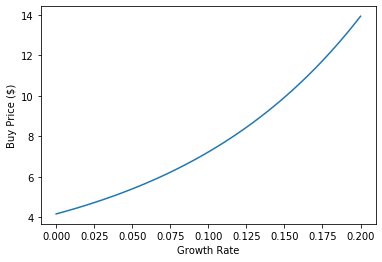

In [30]:
txrh_data = pd.read_csv('txrh.csv', index_col=0)

txrh_data = txrh_data.transpose()

TXRH = Company(txrh_data)
print(TXRH.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
TXRH.get_avg_revenue_growth(),
"\ncash for owners\n",
TXRH.get_cash_for_owners(),
"\nAVG cash growth\n",
TXRH.get_avg_owners_cash_growth(),
"\nROIC\n",
TXRH.get_roic(),
"\nP/E\n",
TXRH.price_to_eps(),
"\neps growth\n",
TXRH.eps_growth(),
"\ndebt to equity\n",
TXRH.get_debt_to_equity())


2013          NaN
2014          NaN
2015     8.217968
2016     3.779473
2017    16.559952
2018    12.929076
2019    10.430136
dtype: float64
None 
AVG revenue growth
 42.15586304016625 
cash for owners
 2013          NaN
2014     9.701754
2015     7.971429
2016     7.407767
2017    35.603896
2018    45.639640
2019    80.103448
dtype: float64 
AVG cash growth
 91.88462976786408 
ROIC
 2013          NaN
2014          NaN
2015     8.217968
2016     3.779473
2017    16.559952
2018    12.929076
2019    10.430136
dtype: float64 
P/E
 2013           NaN
2014           NaN
2015           NaN
2016    400.000000
2017     49.545455
2018     78.428571
2019     50.000000
dtype: float64 
eps growth
 221.8073593073593 
debt to equity
 2013         NaN
2014         NaN
2015    0.931507
2016    0.255102
2017    0.289720
2018    0.525568
2019    0.474576
dtype: float64


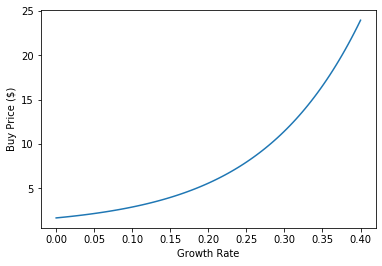

In [32]:
wtc_data = pd.read_csv('wtc.csv', index_col=0)

wtc_data = wtc_data.transpose()

wtc = Company(wtc_data)
print(wtc.plot_growth_rate_vs_buy_price(.40),
"\nAVG revenue growth\n",
wtc.get_avg_revenue_growth(),
"\ncash for owners\n",
wtc.get_cash_for_owners(),
"\nAVG cash growth\n",
wtc.get_avg_owners_cash_growth(),
"\nROIC\n",
wtc.get_roic(),
"\nP/E\n",
wtc.price_to_eps(),
"\neps growth\n",
wtc.eps_growth(),
"\ndebt to equity\n",
wtc.get_debt_to_equity())

None 
AVG revenue growth
 7.310960863518409 
cash for owners
 2009         NaN
2010   -0.307692
2011    2.350000
2012    3.200000
2013    2.913043
2014    1.954545
2015    2.952381
2016   -3.000000
2017   -1.909091
2018   -0.833333
2019    3.172414
dtype: float64 
AVG cash growth
 -177.04602160262937 
ROIC
 2009          NaN
2010    -2.051282
2011    11.750000
2012    11.851852
2013    10.044978
2014     6.739812
2015     9.841270
2016    -9.677419
2017    -5.965909
2018    -2.525253
2019     8.812261
dtype: float64 
P/E
 2009          NaN
2010          inf
2011     9.000000
2012    12.000000
2013     9.000000
2014    10.500000
2015     8.500000
2016    17.000000
2017    20.000000
2018    16.000000
2019     8.333333
dtype: float64 
eps growth
 inf 
debt to equity
 2009    0.133333
2010    0.133333
2011    0.263158
2012    0.148148
2013    0.068966
2014    0.068966
2015    0.066667
2016    0.100000
2017    0.129032
2018    0.187500
2019    0.235294
dtype: float64


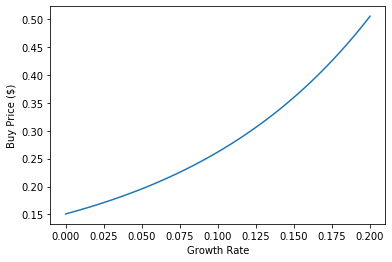

In [57]:
xrf_data = pd.read_csv('xrf.csv', index_col=0)

xrf_data = xrf_data.transpose()

xrf = Company(xrf_data)
print(xrf.plot_growth_rate_vs_buy_price(.20),
"\nAVG revenue growth\n",
xrf.get_avg_revenue_growth(),
"\ncash for owners\n",
xrf.get_cash_for_owners(),
"\nAVG cash growth\n",
xrf.get_avg_owners_cash_growth(),
"\nROIC\n",
xrf.get_roic(),
"\nP/E\n",
xrf.price_to_eps(),
"\neps growth\n",
xrf.eps_growth(),
"\ndebt to equity\n",
xrf.get_debt_to_equity())